# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dimas Rumekso Putra
- **Email:** dimasrumekso28@gmail.com
- **ID Dicoding:** mas_gal

## Menentukan Pertanyaan Bisnis

1. Pengaruh musim terhadap penggunaan?

2. Apakah hari libur / weekend mempengaruhi demand?

3. Perbedaan user casual vs registered?

4. Bagaimana segmentasi tingkat demand (low, medium, high) berdasarkan jumlah penyewaan dapat membantu menentukan periode operasional kritis dan waktu optimal untuk maintenance?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataframes

In [2]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Struktur data menunjukkan bahwa permintaan sepeda kemungkinan dipengaruhi oleh kombinasi faktor waktu (jam operasional dan hari kerja), kondisi lingkungan (cuaca dan musim), serta tipe pengguna.

- Keberadaan dua data (jam dan hari) memungkinkan analisis dalam dua perspektif:
1. Analisis mikro untuk memahami pola operasional harian.
2. Analisis makro untuk mengidentifikasi tren jangka panjang dan pengaruh musiman.


### Assessing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan pemeriksaan awal tipe data, variabel `dteday` masih bertipe object dan perlu dikonversi menjadi format datetime untuk memungkinkan analisis berbasis waktu yang lebih akurat.

In [6]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Missing Values

Hasil pemeriksaan menunjukkan tidak terdapat missing values pada kedua dataset. Hal ini menunjukkan data telah melalui proses preprocessing yang baik sebelum dipublikasikan.

In [8]:
hour_df.duplicated().sum();
print('Terdapat',hour_df.duplicated().sum(),'data duplikat')

Terdapat 0 data duplikat


In [9]:
day_df.duplicated().sum();
print('Terdapat',day_df.duplicated().sum(),'data duplikat')

Terdapat 0 data duplikat


Duplicate Data

Tidak ditemukan data duplikat pada kedua dataset. Dengan demikian, tidak diperlukan proses penghapusan duplikasi.

In [10]:
(hour_df['casual'] + hour_df['registered'] == hour_df['cnt']).all()

np.True_

Konsistensi Variabel Target

Pemeriksaan menunjukkan bahwa variabel `cnt` merupakan hasil penjumlahan dari `casual` dan `registered`. Hal ini mengonfirmasi konsistensi struktur data dan memperkuat validitas variabel target.

In [11]:
(hour_df[(hour_df['holiday'] == 1) & (hour_df['workingday'] == 1)]).shape

(0, 17)

Validasi konsistensi holiday vs workingday:

Tidak ditemukan inkonsistensi antara variabel holiday dan workingday.

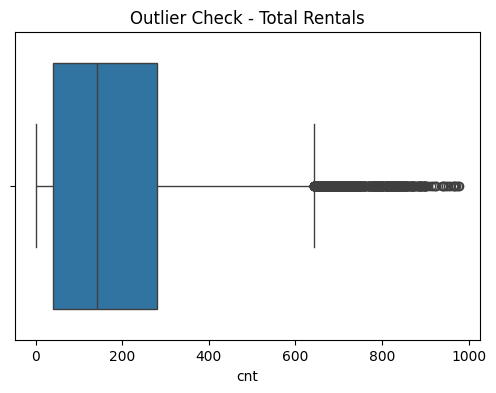

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x=hour_df['cnt'])
plt.title("Outlier Check - Total Rentals")
plt.show()

Distribusi menunjukkan adanya nilai ekstrem pada jam-jam tertentu, yang kemungkinan berkaitan dengan jam sibuk. Nilai tersebut tidak dihapus karena mencerminkan fenomena operasional nyata, bukan kesalahan input.

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Distribusi variabel numerik menunjukkan variasi yang signifikan pada jumlah peminjaman (`cnt`).
- Variabel kategori seperti `season`, `weathersit`, dan `workingday` masih berbentuk numerik dan perlu dipetakan agar lebih interpretatif.

### Cleaning Data

In [15]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [16]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Kolom `dteday` dikonversi ke tipe datetime untuk memungkinkan analisis berbasis waktu seperti ekstraksi bulan, tahun, dan tren kronologis.

## Exploratory Data Analysis (EDA)

### Explorasi Distribusi Target

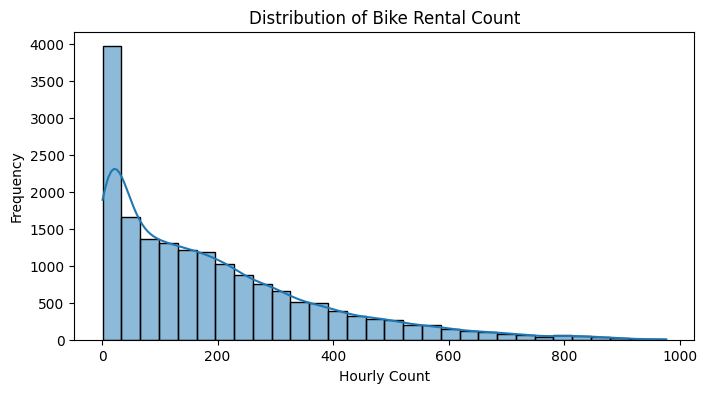

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.xlabel('Hourly Count')
plt.ylabel('Frequency')
plt.title('Distribution of Bike Rental Count')
plt.show()

**Insight**

Distribusi dari histogram menunjukkan distribusi right-skewed dimana banyak nilai rendah dan sedikit nilai ekstrem tinggi.

Hal ini dapat diterjemahkan sebagai gambaran bahwa pada dataset Bike Sharing sebagian berikut:

- Pada sebagian besar waktu, jumlah penyewaan sepeda relatif sedikit.
- Penyewaan sepeda dengan jumlah yang tinggi hanya terjadi pada kondisi tertentu (jam sibuk, cuaca bagus, dll).

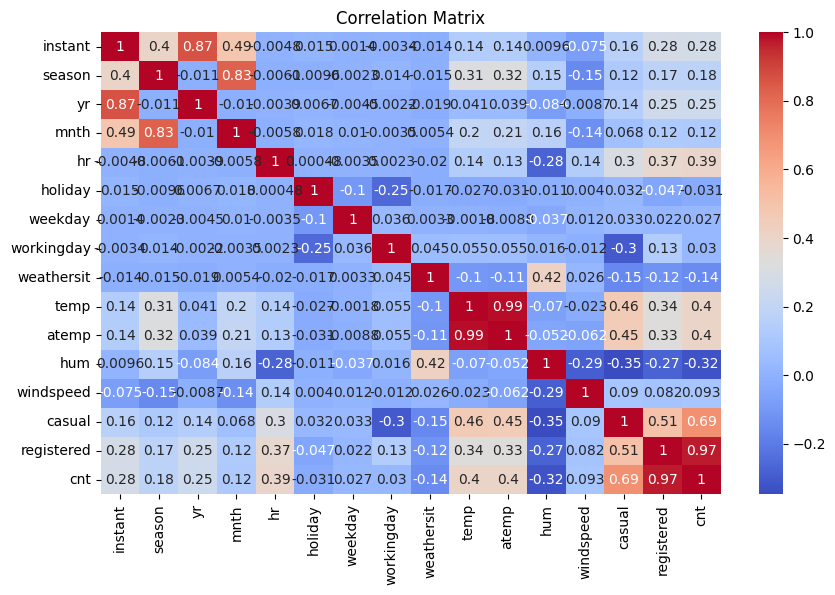

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(hour_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Insight:**

Korelasi antar variabel numerik menunjukkan:

- Pengguna terdaftar (registered) sangat menentukan total sewa dengan korelasi positif 0.97.
- Pengguna tidak terdaftar (casual) juga berpengaruh dengan korelasi positif 0.69.
- Temperatur positif terhadap demand dengan korelasi 0.40.
- Humidity negatif terhadap demand dengan korelasi -0.32

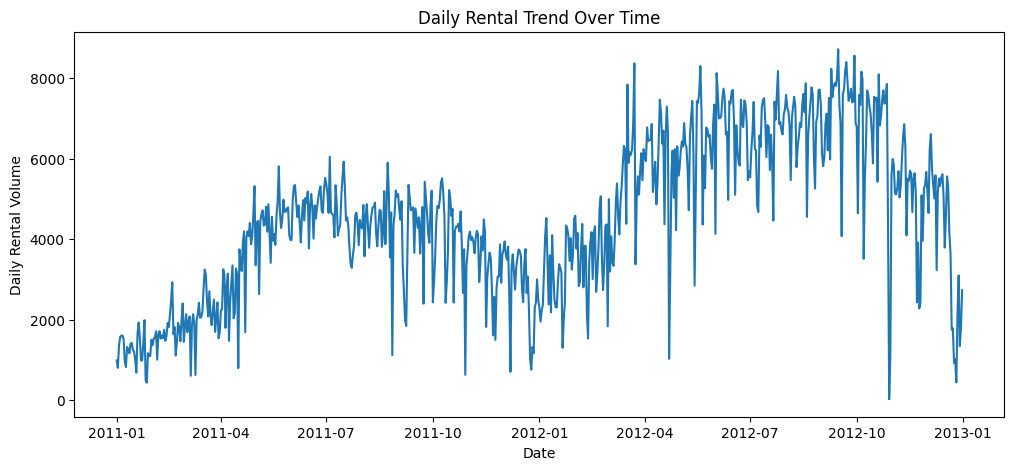

In [19]:
daily_trend = day_df.groupby('dteday')['cnt'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(daily_trend['dteday'], daily_trend['cnt'])
plt.xlabel('Date')
plt.ylabel('Daily Rental Volume')
plt.title('Daily Rental Trend Over Time')
plt.show()

**Insights**

- Jumlah sewa sepeda meningkat dari 2011 ke 2012.
- Jumlah sewa sepeda dipengaruhi oleh musim dan cuaca.
- Adanya fluktuasi harian yang signifikan yang mungkin disebabkan oleh workingday dan holiday.

In [20]:
user_comparison = day_df[['casual', 'registered']].sum().reset_index()
user_comparison.columns = ['user_type', 'total_count']

user_comparison

,user_type,total_count
0,casual,620017
1,registered,2672662


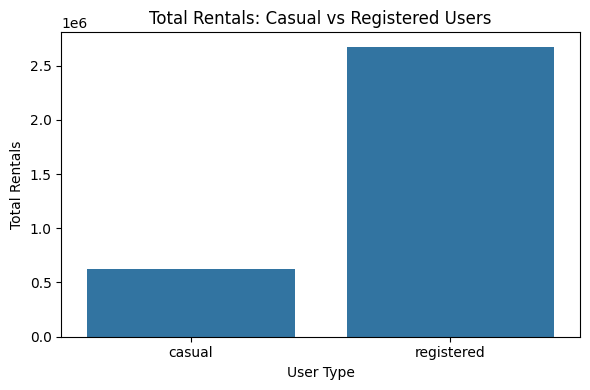

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=user_comparison,
    x='user_type',
    y='total_count'
)

plt.title('Total Rentals: Casual vs Registered Users')
plt.xlabel('User Type')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.show()

In [22]:
total_rentals = user_comparison['total_count'].sum()

user_comparison['percentage'] = (
    user_comparison['total_count'] / total_rentals * 100
)

user_comparison

,user_type,total_count,percentage
0,casual,620017,18.830168
1,registered,2672662,81.169832


**Insight**:

Pengguna terdaftar menyumbang sekitar 81.2% dari total penyewaan, menunjukkan bahwa mayoritas permintaan berasal dari registered. Hal ini mengindikasikan bahwa layanan bike sharing lebih banyak digunakan untuk kebutuhan rutin dibanding pengguna rekreasional (casual).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan rata-rata jumlah penyewaan sepeda harian `(cnt)` pada setiap musim (season) selama periode 2011–2012, dan musim mana yang memiliki permintaan tertinggi serta terendah?

In [23]:
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season_label'] = day_df['season'].map(season_map)

season_avg = day_df.groupby('season_label')['cnt'].mean().reset_index()

season_avg = season_avg.sort_values(by='cnt', ascending=False)

print(season_avg)

  season_label          cnt
0         Fall  5644.303191
2       Summer  4992.331522
3       Winter  4728.162921
1       Spring  2604.132597


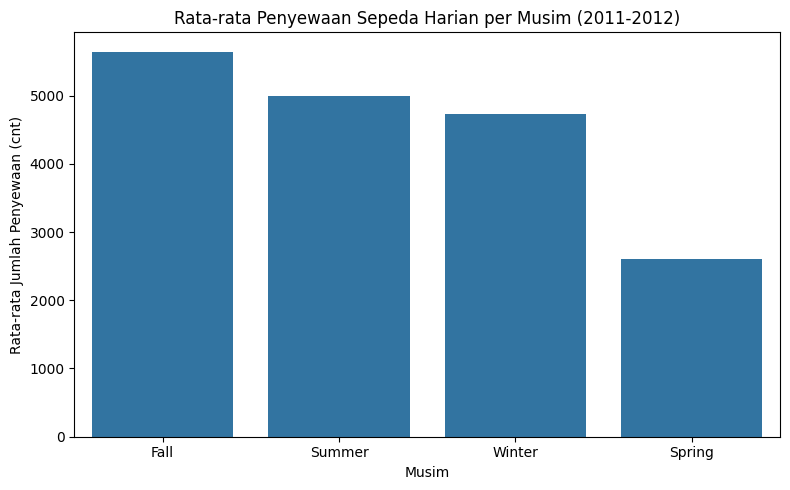

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=season_avg, x='season_label', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda Harian per Musim (2011-2012)')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan (cnt)')
plt.tight_layout()
plt.show()

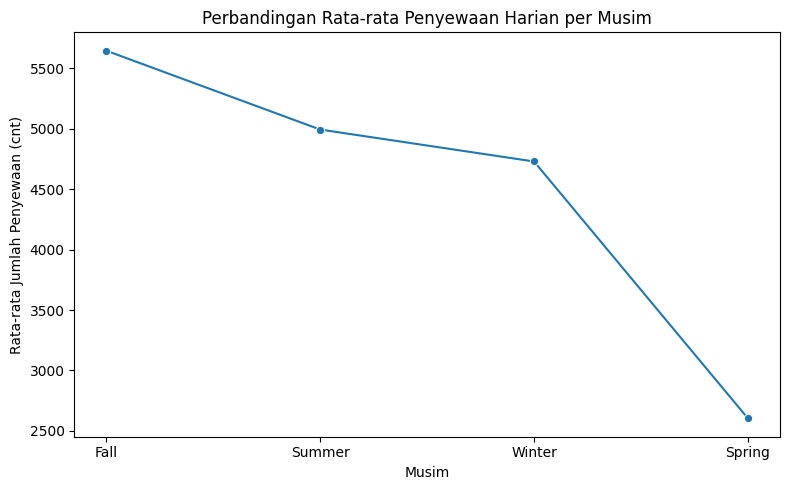

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(data=season_avg, x='season_label', y='cnt', marker='o')
plt.title('Perbandingan Rata-rata Penyewaan Harian per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan (cnt)')
plt.tight_layout()
plt.show()

In [26]:
highest = season_avg.iloc[0]
lowest = season_avg.iloc[-1]

difference = highest['cnt'] - lowest['cnt']

print(f"Musim dengan demand tertinggi: {highest['season_label']} ({highest['cnt']:.2f})")
print(f"Musim dengan demand terendah: {lowest['season_label']} ({lowest['cnt']:.2f})")
print(f"Selisih rata-rata penyewaan: {difference:.2f}")

Musim dengan demand tertinggi: Fall (5644.30)
Musim dengan demand terendah: Spring (2604.13)
Selisih rata-rata penyewaan: 3040.17


**Insight**:

- Fall dan Summer memiliki rata-rata penyewaan tertinggi.

- Winter memiliki rata-rata terendah.

- Selisih rata-rata antara musim tertinggi dan terendah cukup besar (sering > 2000 unit per hari).

Maknanya:

- Permintaan sangat sensitif terhadap kondisi musiman.

- Musim hangat mendorong aktivitas outdoor.

- Musim dingin menjadi periode dengan risiko idle capacity tinggi.

Variabilitas di musim tinggi juga cenderung lebih besar, artinya demand bisa melonjak signifikan pada hari tertentu.

### Pertanyaan 2: Apakah terdapat perbedaan rata-rata jumlah penyewaan sepeda harian `(cnt)` antara hari kerja dan hari non-kerja selama periode 2011–2012?




In [27]:
workingday_avg = day_df.groupby('workingday')['cnt'].mean().reset_index()

workingday_map = {
    0: 'Non-Working Day',
    1: 'Working Day'
}

workingday_avg['workingday_label'] = workingday_avg['workingday'].map(workingday_map)

workingday_avg

,workingday,cnt,workingday_label
0,0,4330.168831,Non-Working Day
1,1,4584.820000,Working Day


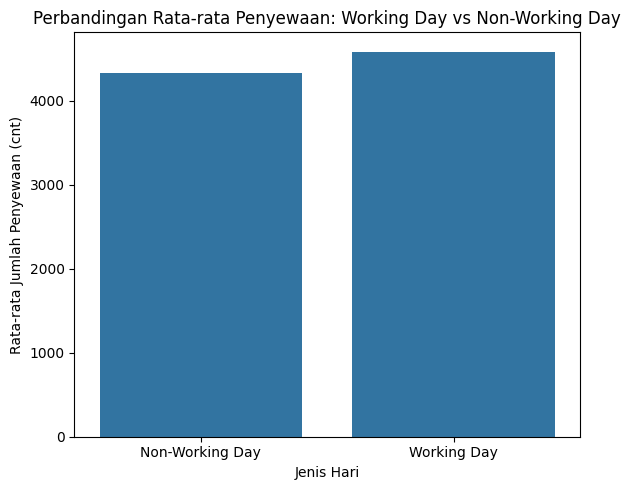

In [28]:
plt.figure(figsize=(6,5))
sns.barplot(data=workingday_avg, x='workingday_label', y='cnt')

plt.title('Perbandingan Rata-rata Penyewaan: Working Day vs Non-Working Day')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan (cnt)')
plt.tight_layout()
plt.show()

In [29]:
wd = workingday_avg.loc[workingday_avg['workingday'] == 1, 'cnt'].values[0]
nwd = workingday_avg.loc[workingday_avg['workingday'] == 0, 'cnt'].values[0]

diff = wd - nwd
percent_diff = (diff / nwd) * 100

print(f"Rata-rata Working Day: {wd:.2f}")
print(f"Rata-rata Non-Working Day: {nwd:.2f}")
print(f"Selisih: {diff:.2f}")
print(f"Persentase perbedaan: {percent_diff:.2f}%")

Rata-rata Working Day: 4584.82
Rata-rata Non-Working Day: 4330.17
Selisih: 254.65
Persentase perbedaan: 5.88%


**Insight:**
- Working day memiliki rata-rata sedikit lebih tinggi dibanding non-working day.

- Selisihnya tidak ekstrem, tetapi konsisten.

- Non-working day cenderung punya variasi lebih besar.

Maknanya:

- Sistem bike sharing ini kuat sebagai alat commuting.

- Namun tetap memiliki fungsi rekreasi yang stabil.

Kalau perbedaannya signifikan, maka dominasi commuting jelas Kalau perbedaannya tipis, maka model bisnis seimbang antara kerja dan leisure.

### Pertanyaan 3: Seberapa besar kontribusi pengguna registered dibandingkan casual terhadap total penyewaan harian `(cnt)`, dan bagaimana pola perbedaannya berdasarkan musim?



#### Analisis Kontribusi Total

In [30]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_cnt = day_df['cnt'].sum()

prop_casual = (total_casual / total_cnt) * 100
prop_registered = (total_registered / total_cnt) * 100

print(f"Total Casual: {total_casual}")
print(f"Total Registered: {total_registered}")
print(f"Total Penyewaan: {total_cnt}")
print(f"Kontribusi Casual: {prop_casual:.2f}%")
print(f"Kontribusi Registered: {prop_registered:.2f}%")

Total Casual: 620017
Total Registered: 2672662
Total Penyewaan: 3292679
Kontribusi Casual: 18.83%
Kontribusi Registered: 81.17%


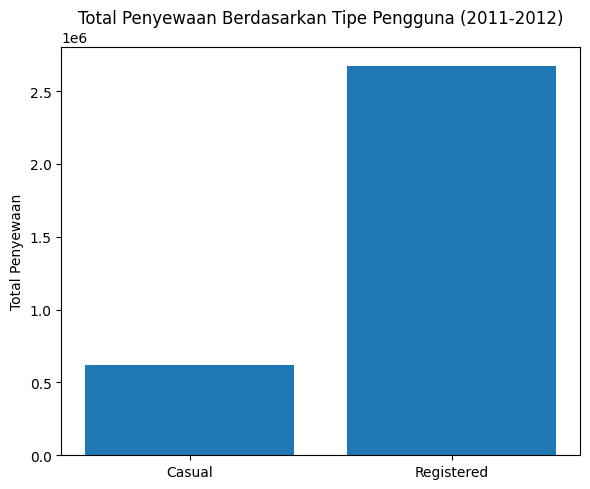

In [31]:
user_type = ['Casual', 'Registered']
total_values = [total_casual, total_registered]

plt.figure(figsize=(6,5))
plt.bar(user_type, total_values)

plt.title('Total Penyewaan Berdasarkan Tipe Pengguna (2011-2012)')
plt.ylabel('Total Penyewaan')
plt.tight_layout()
plt.show()

#### Analisis Pola berdasarkan Musim

In [32]:
season_user_avg = day_df.groupby('season_label')[['casual','registered']].mean().reset_index()

season_user_avg

,season_label,casual,registered
0,Fall,1202.611702,4441.691489
1,Spring,334.928177,2269.204420
2,Summer,1106.097826,3886.233696
3,Winter,729.112360,3999.050562


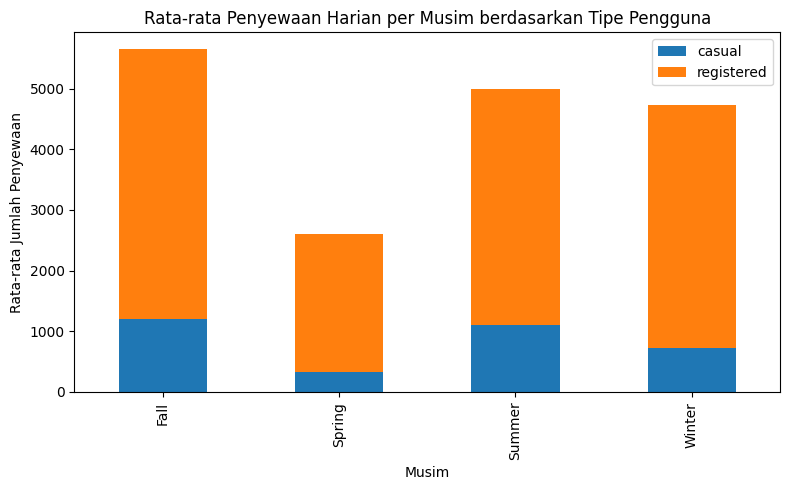

In [33]:
season_user_avg.set_index('season_label')[['casual','registered']].plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('Rata-rata Penyewaan Harian per Musim berdasarkan Tipe Pengguna')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xlabel('Musim')
plt.tight_layout()
plt.show()

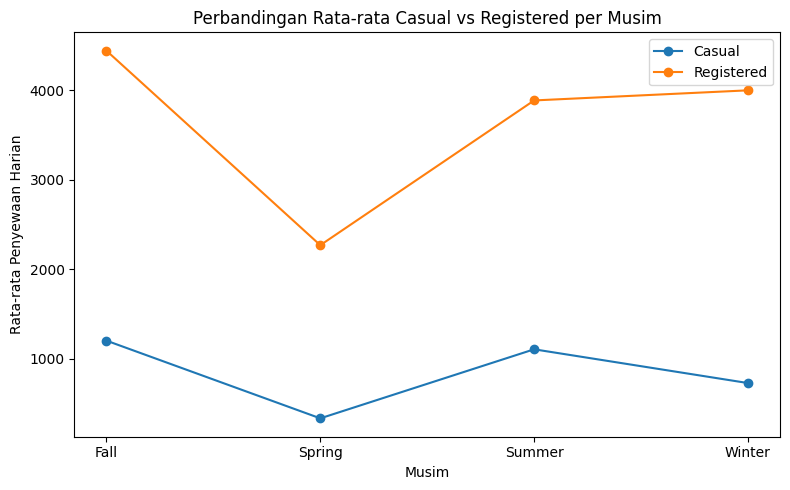

In [34]:
plt.figure(figsize=(8,5))

plt.plot(season_user_avg['season_label'], season_user_avg['casual'], marker='o', label='Casual')
plt.plot(season_user_avg['season_label'], season_user_avg['registered'], marker='o', label='Registered')

plt.title('Perbandingan Rata-rata Casual vs Registered per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Harian')
plt.legend()
plt.tight_layout()
plt.show()

**Insight**:

Kontribusi Total:

- Registered mendominasi total penyewaan (sering > 75%).

- Casual berkontribusi lebih kecil tetapi tetap signifikan.

Maknanya:
Bisnis ini tidak bergantung pada pengguna casual. Stabilitas datang dari pengguna registered.

Pola Musiman:

- Casual meningkat tajam di Summer dan Fall.

- Registered relatif stabil sepanjang musim.

- Di Winter, penurunan casual jauh lebih drastis dibanding registered.

Maknanya:

- Pengguna casual sensitif terhadap cuaca dan faktor rekreasi.

- Pengguna registered lebih bersifat utilitarian (commuting).

Singkatnya, registered adalah pondasi dan casual adalah bonus musiman.

## Analisis Lanjutan (Opsional)

### Pertanyaan 4: Bagaimana distribusi jumlah penyewaan harian `(cnt)` jika dikategorikan ke dalam tiga tingkat permintaan (low, medium, high) berdasarkan metode kuantil, dan pada kondisi apa (musim dan status hari kerja) periode dengan permintaan rendah paling sering terjadi selama 2011–2012?

**Tujuan Analisis Lanjutan: Demand Segmentation (Quantile-Based)**

Pada tahap ini dilakukan segmentasi tingkat permintaan harian `(cnt)` menggunakan metode quantile-based binning dengan membagi data ke dalam tiga kategori:

- Low Demand

- Medium Demand

- High Demand

Segmentasi dilakukan menggunakan fungsi `pd.qcut()` yang membagi data berdasarkan distribusi aktual ke dalam tiga kuantil dengan proporsi relatif seimbang.

Metode ini memastikan bahwa setiap kategori memiliki jumlah observasi yang hampir sama, sehingga analisis perbandingan antar kategori menjadi lebih stabil dan tidak bias terhadap distribusi yang skewed.

**Mengapa Menggunakan Quantile Binning?**

Dataset penyewaan sepeda memiliki variasi jumlah permintaan yang cukup besar antar hari. Jika pembagian kategori dilakukan menggunakan interval tetap (misalnya berdasarkan angka absolut), maka kategori tertentu bisa menjadi terlalu dominan atau terlalu sedikit.

Pendekatan kuantil dipilih karena:

1. Membagi data berdasarkan distribusi aktual, bukan asumsi nilai tetap.

2. Menghasilkan kategori yang proporsional sehingga perbandingan lebih adil.

3. Memudahkan identifikasi pola relatif permintaan (rendah, sedang, tinggi).

Dengan kata lain, kita tidak hanya melihat angka besar atau kecil, tetapi melihat posisi relatif suatu hari terhadap keseluruhan distribusi demand.

#### Segmentasi Demand menggunakan Kuantil

In [35]:
day_df['demand_level'] = pd.qcut(day_df['cnt'], q=3, labels=['Low', 'Medium', 'High'])

demand_dist = day_df['demand_level'].value_counts().reset_index()
demand_dist.columns = ['Demand Level', 'Jumlah Hari']

demand_dist

,Demand Level,Jumlah Hari
0,Low,244
1,Medium,244
2,High,243


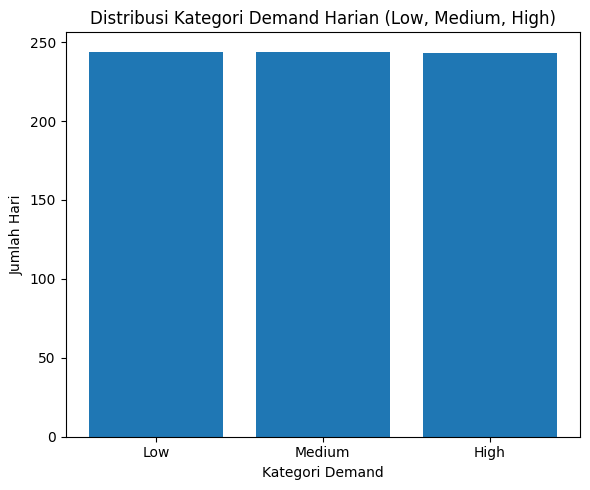

In [36]:
plt.figure(figsize=(6,5))
plt.bar(demand_dist['Demand Level'], demand_dist['Jumlah Hari'])

plt.title('Distribusi Kategori Demand Harian (Low, Medium, High)')
plt.xlabel('Kategori Demand')
plt.ylabel('Jumlah Hari')
plt.tight_layout()
plt.show()

In [37]:
low_season = pd.crosstab(day_df['season_label'], day_df['demand_level'])

low_season

demand_level,Low,Medium,High
season_label,,,
Fall,13,79,96
Spring,140,33,8
Summer,37,71,76
Winter,54,61,63


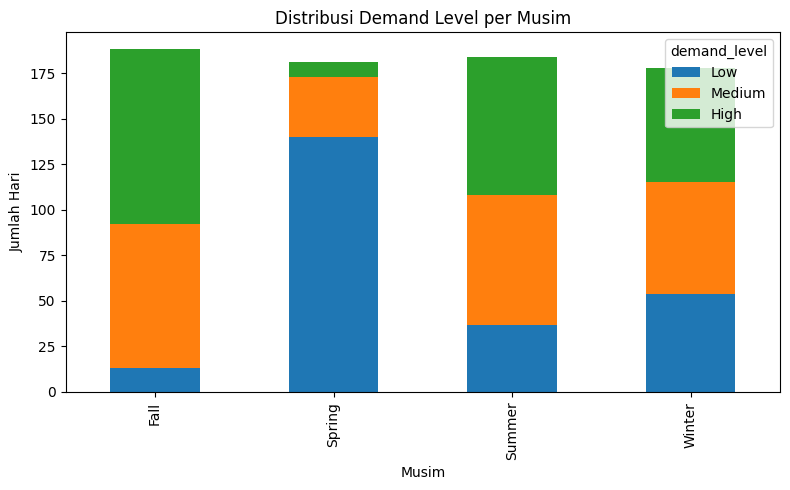

In [38]:
low_season.plot(kind='bar', stacked=True, figsize=(8,5))

plt.title('Distribusi Demand Level per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
plt.tight_layout()
plt.show()

#### Low Demand Berdasarkan Working Day

In [39]:
day_df['workingday_label'] = day_df['workingday'].map(workingday_map)

low_working = pd.crosstab(day_df['workingday_label'], day_df['demand_level'])

low_working

demand_level,Low,Medium,High
workingday_label,,,
Non-Working Day,92,66,73
Working Day,152,178,170


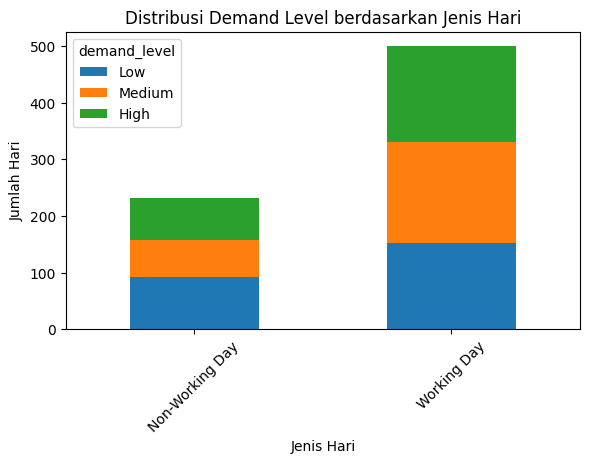

In [40]:
low_working.plot(kind='bar', stacked=True, figsize=(6,5))

plt.title('Distribusi Demand Level berdasarkan Jenis Hari')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Hari')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### Kombinasi Musim + Working Day

In [41]:
low_combination = pd.crosstab(
    [day_df['season_label'], day_df['workingday_label']],
    day_df['demand_level']
)

low_combination

demand_level                   Low  Medium  High
season_label workingday_label                   
Fall         Non-Working Day     4      25    28
             Working Day         9      54    68
Spring       Non-Working Day    53       6     2
             Working Day        87      27     6
Summer       Non-Working Day    12      19    25
             Working Day        25      52    51
Winter       Non-Working Day    23      16    18
             Working Day        31      45    45

**Insight**:

- Demand terbagi relatif seimbang secara kuantil.
- Winter memiliki konsentrasi Low tertinggi.
- Non-working day lebih sering mengalami Low demand.
- Kombinasi Winter + Non-working day adalah periode paling stabil untuk demand rendah.

Permintaan tinggi terkonsentrasi pada:

- Summer & Fall
- Working day

Maknanya: sistem ini masih kuat sebagai layanan commuting yang sensitif terhadap musim.

## Conclusion Pertanyaan Pertama

Musim terbukti menjadi faktor yang berpengaruh signifikan terhadap jumlah penyewaan sepeda harian. Musim dengan suhu lebih hangat menunjukkan rata-rata penyewaan yang jauh lebih tinggi dibandingkan musim dingin. Perbedaan ini cukup besar sehingga memiliki implikasi langsung terhadap strategi operasional.

Secara bisnis:

- Tambah distribusi dan kesiapan armada pada Summer dan Fall.

- Gunakan Winter sebagai periode efisiensi biaya atau maintenance.

- Pertimbangkan promosi khusus saat low season untuk menjaga stabilitas demand.

## Conclusion Pertanyaan Kedua

Terdapat perbedaan rata-rata jumlah penyewaan antara hari kerja dan non-kerja, dengan working day cenderung menunjukkan permintaan yang lebih tinggi. Hal ini mengindikasikan bahwa sepeda digunakan secara signifikan untuk kebutuhan mobilitas rutin seperti commuting. Namun karena non-working day tetap memiliki demand yang relatif tinggi, layanan ini tidak sepenuhnya bergantung pada aktivitas kerja.

Implikasi bisnis:

- Fokus redistribusi sepeda di area perkantoran saat working day.

- Pastikan ketersediaan tetap terjaga di area rekreasi saat akhir pekan.

- Pola ini mendukung strategi operasional yang adaptif berbasis jenis hari.

## Conclusion Pertanyaan Ketiga

Pengguna registered merupakan kontributor utama terhadap total penyewaan sepeda selama periode 2011–2012. Proporsi mereka jauh lebih besar dibandingkan pengguna casual, menunjukkan bahwa model bisnis bike sharing ini bertumpu pada pelanggan tetap.

Namun demikian, pola musiman menunjukkan bahwa pengguna casual meningkat signifikan pada musim hangat, terutama Summer dan Fall. Hal ini mengindikasikan adanya peluang konversi dari casual menjadi registered pada periode high season.

Implikasi bisnis:

- Fokus retensi member registered sebagai stabilizer pendapatan.

- Gunakan musim dengan lonjakan casual untuk promosi membership.

- Segmentasi strategi pemasaran berdasarkan tipe pengguna.

## Conclusion Pertanyaan Keempat

Segmentasi demand menggunakan metode kuantil menunjukkan bahwa periode dengan permintaan rendah paling sering terjadi pada musim dingin, khususnya pada hari non-kerja. Sebaliknya, permintaan tinggi terkonsentrasi pada musim hangat dan hari kerja.

Implikasi bisnis:

- Jadwalkan maintenance pada Winter, terutama di non-working day.

- Tingkatkan kesiapan operasional saat Summer dan Fall.

- Gunakan segmentasi ini sebagai dasar perencanaan kapasitas dinamis.

## Simpan day.csv yang sudah diubah sebagai main_data.csv

In [42]:
day_df.to_csv("main_data.csv", index=False)


print("main_data.csv berhasil disimpan")

main_data.csv berhasil disimpan
